Frequency Transformation

2D Fourier Transformation

image in spatial domain --(Discrete Fourier transformation using fast furioer transformaton method)-> image in frequency representation

FFT -> numpy fft
    -> openCV fft

what is the magnitude spectrum - (a^2 + b^2)^1/2

Fourier Transformation

###### The Use of Fourier transform in Image Processing is basically dominated by two areas:
###### 1. OCR (Optical Character Recognition)
###### 2. Noise Removal

In [5]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

A. Fourier Transformation - Numpy implementation

In [6]:
img = cv2.imread(r'images/lenna.bmp', 0)

ftImg = np.fft.fft2(img)
ftImgAbs = np.abs(ftImg)

fShiftImg = np.fft.fftshift(ftImg)
fShiftImgAbs = np.abs(fShiftImg)

# log transform for better visibilty
magnitudeSpectrumBase = 20 * np.log(np.abs(ftImg))
magnitudeSpectrumShifted = 20 * np.log(np.abs(fShiftImg))

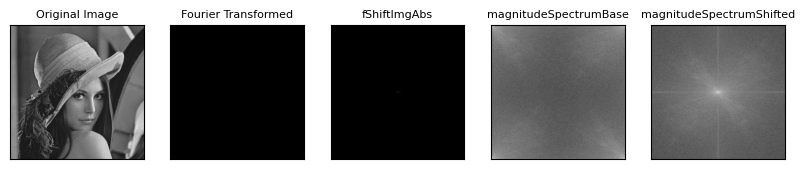

In [7]:
# Plot

titles = ['Original Image', 'Fourier Transformed', 'fShiftImgAbs', 'magnitudeSpectrumBase', 'magnitudeSpectrumShifted']
images = [img, ftImgAbs, fShiftImgAbs, magnitudeSpectrumBase, magnitudeSpectrumShifted]

plt.figure(figsize=(10, 10), num='test.img')

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.title(titles[i], fontsize = 8)
    plt.xticks([]), plt.yticks([])
    plt.imshow(images[i], 'gray')

FT Reversed - Numpy implementation

In [8]:
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
fShiftImg[crow-30:crow+30, ccol-30:ccol+30] = 0

ftShiftWithMask = np.abs(fShiftImg)

fIShift = np.fft.ifftshift(fShiftImg)
imgBack = np.fft.ifft2(fIShift)
imgBack = np.abs(imgBack)

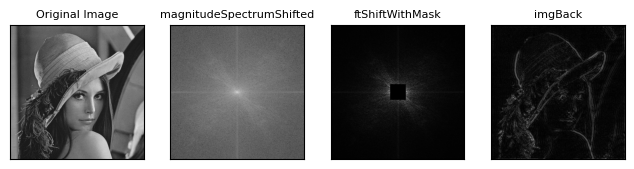

In [9]:
# Plot

titles = ['Original Image', 'magnitudeSpectrumShifted', 'ftShiftWithMask', 'imgBack']
images = [img, magnitudeSpectrumShifted, ftShiftWithMask, imgBack]

plt.figure(figsize=(10, 10), num='test.img')

for i in range(4):
    plt.subplot(1, 5, i+1)
    plt.title(titles[i], fontsize = 8)
    plt.xticks([]), plt.yticks([])
    plt.imshow(images[i], 'gray')

B. Fourier Transformation - OpenCV implementation

In [10]:
img = cv2.imread(r'images\lenna.bmp', 0)

In [11]:
ftImg = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
ftImgAbs = np.abs(cv2.magnitude(ftImg[:,:,0], ftImg[:,:,1]))

fShiftImg = np.fft.fftshift(ftImg)
ftShiftImgAbs = np.abs(cv2.magnitude(fShiftImg[:,:,0], fShiftImg[:,:,1]))

# Log ransform for better visiblity
magnitudeSpectrumBase = 20 * np.log(cv2.magnitude(ftImg[:,:,0], ftImg[:,:,1]))
magnitudeSpectrumShifted = 20 * np.log(cv2.magnitude(fShiftImg[:,:,0], fShiftImg[:,:,1]))

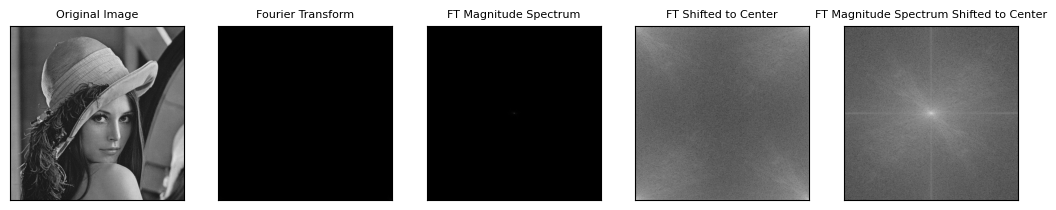

In [12]:
# Plots

titles = ["Original Image", "Fourier Transform", "FT Magnitude Spectrum", "FT Shifted to Center", "FT Magnitude Spectrum Shifted to Center"]
images = [img, ftImgAbs, ftShiftImgAbs, magnitudeSpectrumBase, magnitudeSpectrumShifted]

plt.figure(figsize=(13,10), num='test.img')

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.title(titles[i], fontsize = 8)
    plt.xticks([]), plt.yticks([])
    plt.imshow(images[i], 'gray')

FT reversed - OpenCV implementation

In [13]:
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)

# Create a mask first, center square is 1, remaining all zeroes (a low pass filter - blurring)
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30: crow+30, ccol-30: ccol+30] = 1

# Apply mask and inverse DFT
fShiftMask = fShiftImg * mask
fShiftMaskAbs = np.abs(cv2.magnitude(fShiftMask[:,:,0], fShiftMask[:,:,1]))

fIsShift = np.fft.ifftshift(fShiftMask)
imgBack = cv2.idft(fIsShift)
imgBack = cv2.magnitude(imgBack[:,:,0], imgBack[:,:,1])

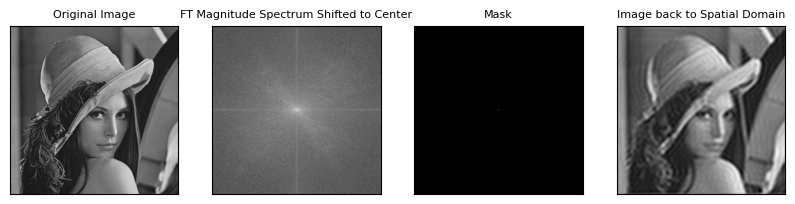

In [14]:
# Plots

titles = ["Original Image", "FT Magnitude Spectrum Shifted to Center", "Mask", "Image back to Spatial Domain"]
images = [img, magnitudeSpectrumShifted, fShiftMaskAbs, imgBack]

plt.figure(figsize=(10, 10), num='test.img')

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.title(titles[i], fontsize = 8)
    plt.xticks([]), plt.yticks([])
    plt.imshow(images[i], 'gray')

C. Frequency Domain Filters

1. Filters – High Pass Filter (For Edge Detection)

In [15]:
img = cv2.imread(r'images/lenna.bmp', 0)

ftImg = np.fft.fft2(img)
fShiftImg = np.fft.fftshift(ftImg)
fShiftImgAbs = np.abs(fShiftImg)

# Log ransform for better visiblity
magnitudeSpectrumShifted = 20 * np.log(np.abs(fShiftImg))

# High pass - a circular mask
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)

mask = np.ones((rows, cols), np.uint8)

r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]

maskArea = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r * r
mask[maskArea] = 0

fShiftAndMask = fShiftImg * mask
ftShiftWithMask = np.abs(fShiftAndMask)

fIsShift = np.fft.ifftshift(fShiftAndMask)
imgBack = np.fft.ifft2(fIsShift)
imgBack = np.abs(imgBack)

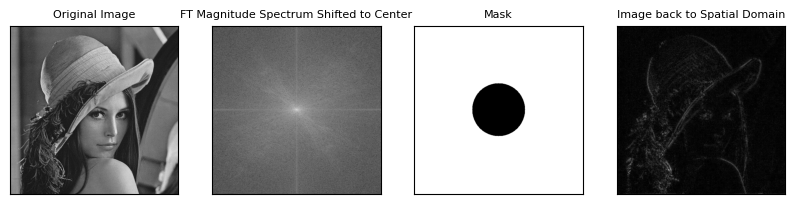

In [16]:
# Plots

titles = ["Original Image", "FT Magnitude Spectrum Shifted to Center", "Mask", "Image back to Spatial Domain"]
images = [img, magnitudeSpectrumShifted, mask, imgBack]

plt.figure(figsize=(10, 10), num='test.img')

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.title(titles[i], fontsize = 8)
    plt.xticks([]), plt.yticks([])
    plt.imshow(images[i], 'gray')

2. Low Pass Filter

In [17]:
img = cv2.imread(r'images/lenna.bmp', 0)

ftImg = np.fft.fft2(img)
fShiftImg = np.fft.fftshift(ftImg)
fShiftImgAbs = np.abs(fShiftImg)

# Log ransform for better visiblity
magnitudeSpectrumShifted = 20 * np.log(np.abs(fShiftImg))

# High pass - a circular mask
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)

mask = np.zeros((rows, cols), np.uint8)

r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]

maskArea = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r * r
mask[maskArea] = 1

fShiftAndMask = fShiftImg * mask
ftShiftWithMask = np.abs(fShiftAndMask)

fIsShift = np.fft.ifftshift(fShiftAndMask)
imgBack = np.fft.ifft2(fIsShift)
imgBack = np.abs(imgBack)

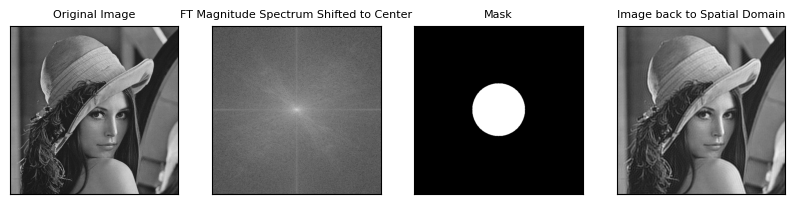

In [18]:
# Plots

titles = ["Original Image", "FT Magnitude Spectrum Shifted to Center", "Mask", "Image back to Spatial Domain"]
images = [img, magnitudeSpectrumShifted, mask, imgBack]

plt.figure(figsize=(10, 10), num='test.img')

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.title(titles[i], fontsize = 8)
    plt.xticks([]), plt.yticks([])
    plt.imshow(images[i], 'gray')

D. Removing Patterned Noise

In [19]:
img = cv2.imread(r'images/clown.jpg', 0)

ftImg = np.fft.fft2(img)
fShiftImg = np.fft.fftshift(ftImg)
fShiftImgAbs = np.abs(fShiftImg)

# Log ransform for better visiblity
magnitudeSpectrumShifted = 20 * np.log(np.abs(fShiftImg))

# band reject - a mask containing 4 black circles
rows, cols = img.shape

mask = np.ones((rows, cols), np.uint8)

r = 4

center1, center2, center3, center4 = [39,106], [51,42], [88,21], [75,84]

x, y = np.ogrid[:rows, :cols]

maskArea1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 <= r * r
mask[maskArea1] = 0

maskArea2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 <= r * r
mask[maskArea2] = 0

maskArea3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 <= r * r
mask[maskArea3] = 0

maskArea4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 <= r * r
mask[maskArea4] = 0

fShiftAndMask = fShiftImg * mask
ftShiftWithMask = np.abs(fShiftAndMask)

fIsShift = np.fft.ifftshift(fShiftAndMask)
imgBack = np.fft.ifft2(fIsShift)
imgBack = np.abs(imgBack)

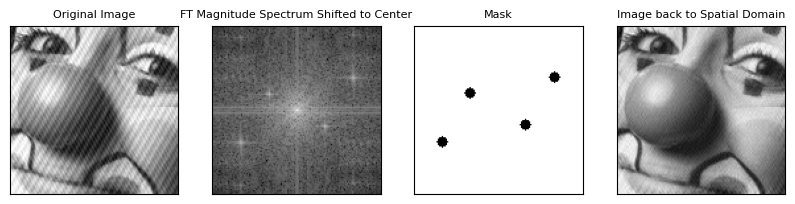

In [20]:
# Plots

titles = ["Original Image", "FT Magnitude Spectrum Shifted to Center", "Mask", "Image back to Spatial Domain"]
images = [img, magnitudeSpectrumShifted, mask, imgBack]

plt.figure(figsize=(10, 10), num='test.img')

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.title(titles[i], fontsize = 8)
    plt.xticks([]), plt.yticks([])
    plt.imshow(images[i], 'gray')